## Generating fake profiles using rule - “People between the ages 10-35 who have Asthma”

In [1]:
# Define profile
profile = {'profile1' : "People between the ages 10-35 who have Asthma"}

### Building GenerationRuleSet function

In [2]:
# import python libraries

import pandas as pd
import numpy as np
from itertools import cycle

# defining the GenerationRuleSet function and its attributes, including the rules for generating the fake profiles.
# my profile - used for building the specific profile rule 
# cols - different column/feature order of data types
# cols_names - name of the column
# intervals - used for controlling fake values of profiles of each datatypes
# seed - save the state to generate random int type feature
def GenerationRuleSet(my_profile,size, cols, col_names = None, intervals = None, seed = None):

    # The function is creating the rules for generating fake profiles .
    # Creating a dictionary and initializing it with the desired rules for generating disease, names, cities & age rules which will be used for profiles
    categories_dict = {'disease': ['ckd', 'liverissue', 'Dementia', 'cancer', 'Heartdisease', 'asthma', 'asthma', 'asthma', 'Diabetes', 'mentalhealth', 'lungcancer', 'asthma', 'asthma', 'asthma', 'cold'],
                       'names'  : ['James', 'Mary', 'Robert', 'Patricia', 'John', 'Jennifer', 'Michael', 'Linda', 'William', 'Elizabeth', 'Ahmed', 'Barbara', 'Richard', 'Susan', 'Salomon', 'Juan Luis'],
                       'cities' : ['NewSouthWales', 'Victoria', 'Queensland', 'SouthAustralia', 'WesternAustralia', 'Tasmania', 'NorthernTerritory', 'CapitalTerritory', 'Adelaide', 'Melbourne', 'Sydney', 'Brisbane', 'Darwin', 'Canberra', 'Canberra'],
                       'age' : [35, 11, 23, 32, 10, 15, 18, 29, 25, 28 ,16, 14, 14 ,23 ,32]
                      }
    
    # Setting intervals to controls the fake values for each datatype.
    # The intervals will be used to control the values for each data type.
    
    # Float type data will be generated within the range 0 and 100 if any is used in profile generation.
    # If there is any date field required that will be created between "2020-01-01" & "2020-12-31"
    
    # i : integer , f : float, c : categorical and d : date type data.
    # Age is an integer value and the range is specified with lower value = 10 and upper value = 60 which is mentioned in the profile.    
    default_intervals = {"i" : (10,60), "f" : (0,100), "c" : ("names", 15), "d" : ("2022-01-01","2022-12-31")}
    
    # random values are created for interger type feature
    rng = np.random.default_rng(seed)

    # First category is created 
    first_c = default_intervals["c"][0]
       
    # Categorical variables will be repeated after 15 intervals.
    categories_names = cycle([first_c] + [c for c in categories_dict.keys() if c != first_c])
    default_intervals["c"] = (categories_names, default_intervals["c"][1])
    
    # check the length of profile template and  print error if new instance of profile exceeds the length. If the new instance does not
    # have the column name, below 'else' block will create the default column name with respective data type suffix with the numeric position
    # derived from enumerate function
    if isinstance(col_names,list):
        assert len(col_names) == len(cols), f"The fake DataFrame should have {len(cols)} columns but col_names is a list with {len(col_names)} elements"
    elif col_names is None:
        suffix = {"c" : "cat", "i" : "int", "f" : "float", "d" : "date"}
        col_names = [f"column_{str(i)}_{suffix.get(col)}" for i, col in enumerate(cols)]

        
    # Checking the interval length and key values. If specific intervals are defined during profile creation use that
    # otherwise use the default interval
    if isinstance(intervals,list):
        assert len(intervals) == len(cols), f"The fake DataFrame should have {len(cols)} columns but intervals is a list with {len(intervals)} elements"
    else:
        if isinstance(intervals,dict):
            assert len(set(intervals.keys()) - set(default_intervals.keys())) == 0, f"The intervals parameter has invalid keys"
            default_intervals.update(intervals)
        intervals = [default_intervals[col] for col in cols]
        
    # new instance of dataframe is defined
    df = pd.DataFrame()
    
    # Building the fake profile dataframe and return to main function
    # all the derived values are used to create the new dataframe with created profiles
    # the column/feature orders are passed as parameter when we call the function GenerationRuleSet(my_profile, size = 50000, cols =  "ciccd")
    # Size = number of records to be created in this profiles
    # my_profile is the profile rule
    # cols is the order of data types
    
    for col, col_name, interval in zip(cols, col_names, intervals):
        if interval is None:
            interval = default_intervals[col]
        assert (len(interval) == 2 and isinstance(interval, tuple)) or isinstance(interval, list), f"This interval {interval} is neither a tuple of two elements nor a list of strings."
        if col in ("i","f","d"):
            start, end = interval
        if col == "i":
            df[col_name] = rng.integers(start, end, size)
        elif col == "f":
            df[col_name] = rng.uniform(start, end, size)
        elif col == "c":
            if isinstance(interval, list):
                categories = np.array(interval)
            else:
                cat_family, length = interval
                if isinstance(cat_family, cycle):
                    cat_family = next(cat_family)
                assert cat_family in categories_dict.keys(), f"There are no samples for category '{cat_family}'. Consider passing a list of samples or use one of the available categories: {categories_dict.keys()}"
                categories = rng.choice(categories_dict[cat_family], length, replace = False, shuffle = True)
            df[col_name] = rng.choice(categories, size, shuffle = True)
        elif col == "d":
            df[col_name] = rng.choice(pd.date_range(start, end), size)
    return df


## The code starts here - main function to build the specific profile

In [3]:

## For testing, profile1 is set to run without manual input
my_profile = 'profile1'

# the column/feature orders are passed as parameter when we call the function GenerationRuleSet(my_profile, size = 50000, cols =  "ciccd")
# Size = number of records to be created in this profiles
# my_profile is the profile rule.
# cols is the order of data types.

df_profile = GenerationRuleSet(my_profile, size = 50000, cols =  "ciccd")

print("***************** Here is the generic profile data *****************" + "\n")

if profile[my_profile] == 'People between the ages 10-35 who have Asthma':
    df_profile.rename(columns ={'column_0_cat':'name', 'column_1_int':'age','column_2_cat':'disease','column_3_cat':'city','column_4_date':'last_tested'}, inplace = True)
    print(df_profile)
    print()
    print("------------ Statistical Distribution of Generic Profile ------------")
    print()
    print(df_profile.describe())
else:
    print('profile did not match')

***************** Here is the generic profile data *****************

          name  age       disease              city last_tested
0      Richard   59        asthma            Darwin  2022-05-21
1         Mary   56    lungcancer          Victoria  2022-03-29
2      Michael   35  mentalhealth  CapitalTerritory  2022-10-14
3        Ahmed   30        asthma          Canberra  2022-04-03
4        Linda   18      Dementia          Canberra  2022-05-13
...        ...  ...           ...               ...         ...
49995  Michael   32    liverissue    SouthAustralia  2022-09-21
49996  Michael   10        asthma  WesternAustralia  2022-08-09
49997  Barbara   40    liverissue          Canberra  2022-10-25
49998  William   31      Dementia          Brisbane  2022-07-23
49999     John   31          cold          Brisbane  2022-11-25

[50000 rows x 5 columns]

------------ Statistical Distribution of Generic Profile ------------

               age
count  50000.00000
mean      34.45818
std    

#### Checking asthma patients

In [4]:
print("To build data for ", profile[my_profile], " : checking the count of various patient groups" + ".\n")
df_profile['disease'].value_counts()

To build data for  People between the ages 10-35 who have Asthma  : checking the count of various patient groups.



asthma          19883
Dementia         3403
ckd              3397
Heartdisease     3389
mentalhealth     3381
lungcancer       3377
cold             3365
cancer           3327
Diabetes         3244
liverissue       3234
Name: disease, dtype: int64

### People between the ages 10-35 who have Asthma

In [5]:
# Asthma dataframe between age 10 to 35
df_asthma_profile = df_profile[(df_profile['age'] >=10) & (df_profile['age'] <= 35) & (df_profile['disease'] == 'asthma')]
print("People between the ages 10-35 who have Asthma:", df_asthma_profile.shape)
print()
print(df_asthma_profile)

People between the ages 10-35 who have Asthma: (10421, 5)

            name  age disease              city last_tested
3          Ahmed   30  asthma          Canberra  2022-04-03
7           John   29  asthma  WesternAustralia  2022-02-20
11         Susan   31  asthma          Victoria  2022-02-22
16       William   30  asthma          Adelaide  2022-07-30
19      Jennifer   22  asthma          Tasmania  2022-09-07
...          ...  ...     ...               ...         ...
49973    Richard   35  asthma            Sydney  2022-12-08
49975    Michael   13  asthma          Canberra  2022-03-15
49978      James   32  asthma            Sydney  2022-08-19
49986  Juan Luis   29  asthma    SouthAustralia  2022-07-25
49996    Michael   10  asthma  WesternAustralia  2022-08-09

[10421 rows x 5 columns]


### Plot the distribution of values in the age column using a histogram - Random distribution


Distribution of values in age of asthma patients



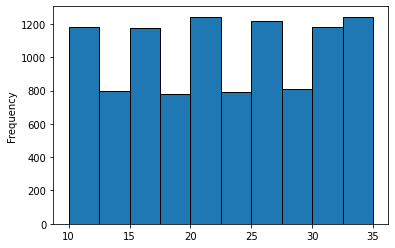

In [6]:
# Plot distribution of values in points column using histogram
print("\n" + "Distribution of values in age of asthma patients"+ "\n")
df_asthma_profile['age'].plot(kind='hist', edgecolor='black')

## Let's create triangular distribution

In [7]:
# Generating asthma dataframe from the profile dataframe
df_asthma = df_profile[(df_profile['disease'] == 'asthma')]
print("People who have Asthma:", df_asthma.shape)
print()

df_asthma.reset_index(drop=True, inplace=True)
print(df_asthma)

People who have Asthma: (19883, 5)

            name  age disease              city last_tested
0        Richard   59  asthma            Darwin  2022-05-21
1          Ahmed   30  asthma          Canberra  2022-04-03
2      Juan Luis   39  asthma          Canberra  2022-11-15
3           John   29  asthma  WesternAustralia  2022-02-20
4          Susan   31  asthma          Victoria  2022-02-22
...          ...  ...     ...               ...         ...
19878      James   32  asthma            Sydney  2022-08-19
19879    Richard   39  asthma          Canberra  2022-12-12
19880  Juan Luis   29  asthma    SouthAustralia  2022-07-25
19881   Jennifer   51  asthma    SouthAustralia  2022-09-12
19882    Michael   10  asthma  WesternAustralia  2022-08-09

[19883 rows x 5 columns]


### Applying formula of Triangular Distribution, to make it a triangle, a high count of Asthma patients at a higher age is required.

People who have Asthma: 19883

Min Age have Asthma: 10
Max age have Asthma: 59



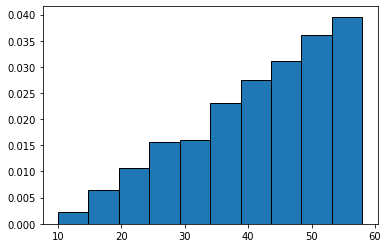

In [8]:
print("People who have Asthma:", df_asthma.shape[0])
print()
print("Min Age have Asthma:", df_asthma['age'].min())
print("Max age have Asthma:", df_asthma['age'].max())
print()

# Here is the distribution rule for Triangular distribution applied on Age column which was random in earlier part.
tri_distribution = np.random.triangular(df_asthma['age'].min(), df_asthma['age'].max(), df_asthma['age'].max(), df_asthma.shape[0])
tri_distribution = tri_distribution.astype(int)

# import the matplotlib and plot the distribution
import matplotlib.pyplot as plt
plt.hist(tri_distribution, bins = 10, density = True, edgecolor='black')
plt.show()

Now we see Min Age have Asthma: 10 and Max age have Asthma: 59, with this the distribution is triangular.